# Predicting Heart Disease

## Preparing Tool

In [1]:
# Import all the Tools

#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evalution
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
# Data Exploration (Exploratory Data Analysis)
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

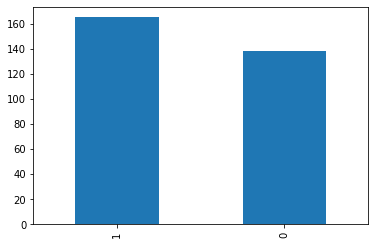

In [6]:
df["target"].value_counts().plot(kind="bar");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing Values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


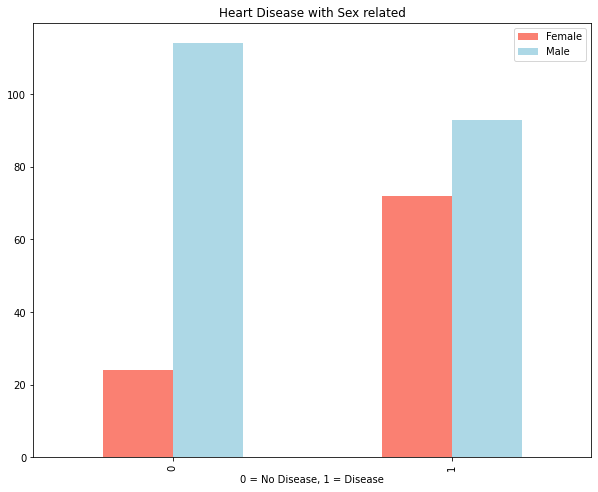

In [12]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar", color=["salmon", "lightblue"],figsize=(10,8));
plt.title("Heart Disease with Sex related")
plt.legend(['Female', 'Male'])
plt.xlabel("0 = No Disease, 1 = Disease")
plt.xticks();

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


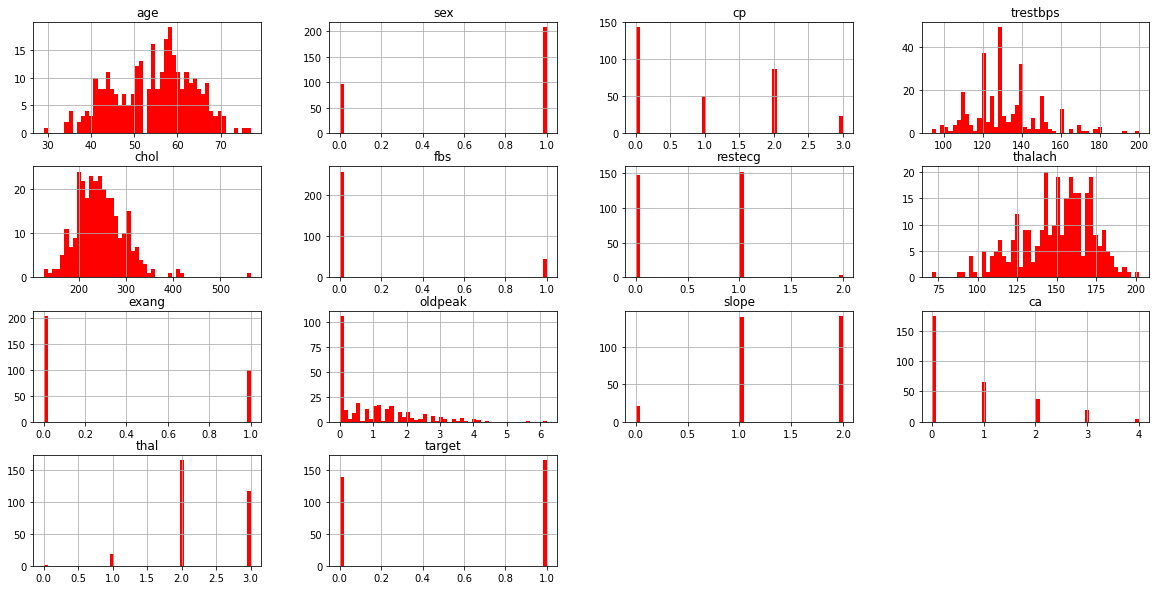

In [14]:
df.hist(figsize=(20,10), bins=50, color="red");

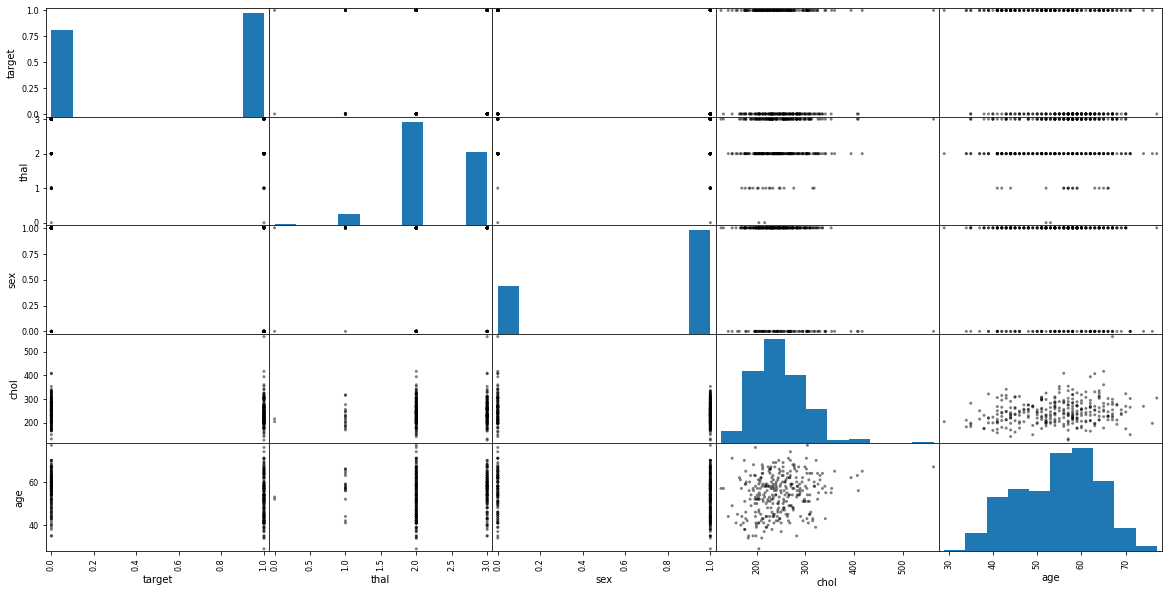

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["target","thal","sex","chol","age"]
scatter_matrix(df[attributes], figsize=(20,10),color="black");

### Age vs Max Heart Rate for Heart Disease

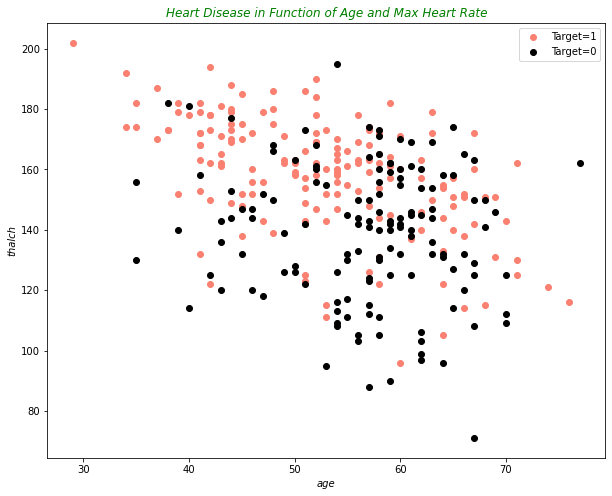

In [16]:
# Create another Figure
plt.figure(figsize=(10,8))

#Scatter with Positive Examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='salmon');

#Scatter with Negative Examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="Black");

#Add Some Info
plt.title("Heart Disease in Function of Age and Max Heart Rate", fontstyle="italic", color="green")
plt.xlabel("age", fontstyle='oblique')
plt.ylabel("thalch", fontstyle='oblique')
plt.xticks()
plt.legend(["Target=1","Target=0"]);

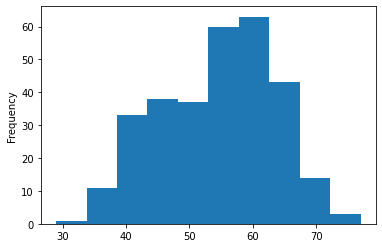

In [17]:
# Check distribution of age with histogram
df.age.plot.hist();

In [18]:
# Heart Disease frequency per Chest Pain Type
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


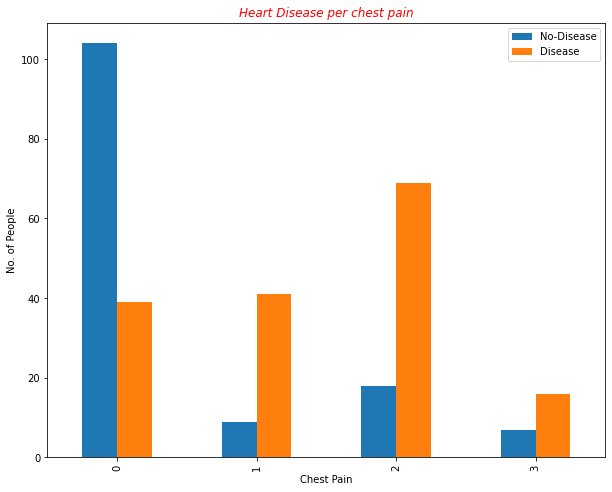

In [19]:
#make the crosstab more visual

pd.crosstab(df['cp'],df['target']).plot(kind='bar',figsize=(10,8));
plt.title('Heart Disease per chest pain', fontstyle='italic', color='red')
plt.xlabel('Chest Pain')
plt.ylabel('No. of People')
plt.xticks()
plt.legend(['No-Disease','Disease']);

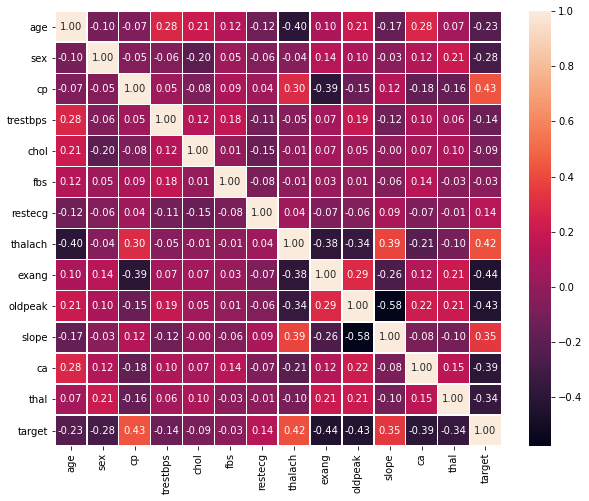

In [20]:
#Corelation Heatmap

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

## Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Split data into train & test set
#fbs and exang
from sklearn.model_selection import StratifiedShuffleSplit
splits = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in splits.split(df, df['fbs'],df['exang']):
    strat_train_set = df.loc[train_index]
    strat_test_Set = df.loc[test_index]

In [23]:
strat_train_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


In [24]:
strat_test_Set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3,0
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


In [25]:
X_train = strat_train_set.drop('target',axis=1)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2


In [26]:
Y_train = strat_train_set['target']
Y_train

146    1
199    0
198    0
257    0
96     1
      ..
213    0
178    0
31     1
34     1
79     1
Name: target, Length: 242, dtype: int64

In [27]:
X_test = strat_test_Set.drop('target',axis=1)
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2


In [28]:
Y_test = strat_test_Set['target']
Y_test

218    0
247    0
128    1
250    0
256    0
      ..
78     1
29     1
73     1
58     1
107    1
Name: target, Length: 61, dtype: int64

In [29]:
#Put models in a divctionary
models= {"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#Create a function to fit & score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """Fit and evalute given Machine learbibg Model"""
    np.random.seed(42)
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        #Fit the model to data
        model.fit(X_train,Y_train)
        #Evalute the model and append its score
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)

C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.8524590163934426}

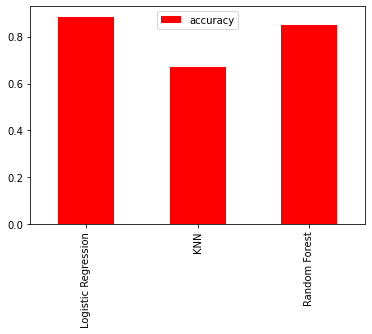

In [32]:
model_df = pd.DataFrame(model_scores, index=['accuracy'])
model_df.T.plot(kind='bar', color='red');

## Hyperparameter Tuning

In [33]:
# Tuning KNN

train_Scores = []
test_scores = []

#List of Different values for KNN
neighbours = range(1,20)
KNN = KNeighborsClassifier()

#Loop Through Different n_neighbours
for i in neighbours:
    KNN.set_params(n_neighbors=i)
    
    #Fit the algorithm
    KNN.fit(X_train, Y_train)
    
    #Update the training & testing Scores List
    train_Scores.append(KNN.score(X_train,Y_train))
    test_scores.append(KNN.score(X_test,Y_test))

In [34]:
test_scores

[0.639344262295082,
 0.5901639344262295,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7213114754098361,
 0.639344262295082,
 0.6557377049180327,
 0.7049180327868853,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327]

Max. KNN score 72.13%


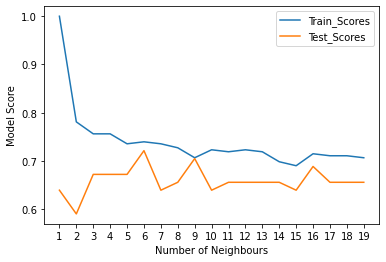

In [35]:
plt.plot(neighbours, train_Scores, label='Train_Scores')
plt.plot(neighbours, test_scores, label='Test_Scores')
plt.xticks(np.arange(1,20,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend();

print(f"Max. KNN score {max(test_scores)*100:.2f}%")

*** Randomised Search CV ***

In [36]:
#Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4,4,20),
               "solver":['newton-cg','liblinear','saga'],
               "class_weight":[None, 'balanced'],
               'penalty':['l1','l2','elasticnet']}

#Create a hyperparametr grid for RandomForestClassifier
random_grid = {"n_estimators":np.arange(10,1000,100),
              "max_depth":[None,3,5,10],
              "min_samples_split":np.arange(2,20,2),
              "min_samples_leaf":np.arange(1,20,2)}


In [37]:
np.random.seed(42)

#Tune logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               verbose=True,
                               n_iter=20)

#Tune Random Forest
rs_random_reg = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=random_grid,
                               cv=5,
                               verbose=True,
                               n_iter=20)

In [38]:
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\linear_model\_sag

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'saga']},
                   verbose=True)

In [39]:
rs_log_reg

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'class_weight': [None, 'balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'saga']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear',
 'penalty': 'l2',
 'class_weight': 'balanced',
 'C': 0.08858667904100823}

In [41]:
rs_log_reg.score(X_test,Y_test)

0.8524590163934426

In [42]:
np.random.seed(42)
rs_random_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
                   verbose=True)

In [43]:
rs_random_reg.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_depth': None}

In [44]:
rs_random_reg.score(X_test,Y_test)

0.8852459016393442

**Grid Search**

In [45]:
gs_random_reg = GridSearchCV(RandomForestClassifier(),
                            param_grid=random_grid,
                            cv=5,
                            verbose=2)

In [46]:
gs_random_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=710; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=310; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=410; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=16, n_estimators=910; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=18, n_

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=510; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=610; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=210; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=710; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=710; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=710; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=810; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estimators=910; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=310; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=410; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=410; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=410; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=410; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=12, n_estimators=410; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=16, n

[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=410; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=610; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=610; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=18, n_estimators=610; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=3, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=610; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=610; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=210; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=810; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=810; total time=   4.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=810; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=410; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=410; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=410; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=410; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=16, n_estimators=510; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=110; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimators=210; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=2, n_estimato

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=610; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=710; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estimators=810; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=4, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=210; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=310; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estimators=410; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=8, n_estim

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=810; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=810; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=810; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=10, n_estimators=910; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=12

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=410; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=14, n_estimators=510; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=7, min_samples_split=18, 

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=210; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=210; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=210; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=310; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estimators=410; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=810; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=810; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=810; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   4.1s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=8, n_estimators=910; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=10, n_esti

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=410; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=410; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=410; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=410; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   4.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=12, n_estimators=510; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=110; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   4.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=110; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=210; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=310; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=310; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=4, n_estimators=310; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=910; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=6, n_estimators=910; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=10, n_estimators=510; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   3.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_sp

[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   2.1s
[CV] END max_depth=None, min_samples_leaf=11, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_sample

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=8, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=510; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=510; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=510; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=510; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=12, n_estimators=510; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=210; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=210; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=16, n_estimators=210; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=610; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=710; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=710; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=710; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=810; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=15, min_samples_split=18, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=15, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=310; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=4, n_estimators=410; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=910; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=910; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=910; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=910; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=910; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=8

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=210; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   1.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=810; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=16, n_estimators=810; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=17, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=6

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=18, n_estimators=410; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=19, min_sampl

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV]

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=710; total time=   0.8s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=310; total tim

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=10; total time

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=16, n_estimators=610; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=210; total time=   0.2s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=910; total time=   1.1s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=410; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=8, n_estimators=510; total time=   0.6s


[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=12, n_estimators=210; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=14, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=3, min_samples_split=18, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=4, n_estimators=210; total time=   0.2s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   1.1s


[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=14, n_estimators=210; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=16, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=410; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=410; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=2, n_estimators=510; total time=   0.6s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=6, n_estimators=210; total time=   0.2s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=8, n_estimators=910; total time=   1.2s


[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=410; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=410; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=12, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total tim

[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   0.7s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.3s


[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=210; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=10, n_estimators=210;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=12, n_estimators=910;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=16, n_estimators=510;

[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=910; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=18, n_estimators=910; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time= 

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total tim

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total tim

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=12, n_estimators=10; to

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=610;

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=210;

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=2, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=510; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=6, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=10, n_estimators=210;

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=710; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=710; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=910;

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=310; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=16, n_estimators=510;

[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=18, n_estimators=910; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=15, min_samples_split=18, n_estimators=910; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time= 

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total tim

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=210; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=210; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=210; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total tim

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=810; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=810; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=12, n_estimators=10; to

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610;

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=18, n_estimators=210;

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=710; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   1.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=2, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=10, n_estimators=210; t

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=610; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.7s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=12, n_estimators=810;

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=16, n_estimators=410;

[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=910; total time=   3.0s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=910; total time=   3.3s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=910; total time=   3.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=18, n_estimators=910; total time=   3.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=410; total time=   1.3s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   4.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   7.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   6.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   5.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   7.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   6.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time= 

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   3.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   3.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total tim

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total tim

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=910; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=910; total time=   3.1s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=910; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=910; total time=   2.5s


[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=610; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=610; total time=   1.6s


[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total tim

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=510; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=16, n_estimators=510; total tim

[CV] END max_depth=5, min_samples_leaf=3, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV]

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=4, n_estimators=810; total time=   2.6s


[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=8, n_estimators=410; total time=   1.3s


[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   3.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=12, n_estimators=110; total time=   

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=14, n_estimators=710; total tim

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=410; total tim

[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=2, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV

[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=6, n_estimators=710; total time=   2.4s


[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=310; total tim

[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=12, n_estimators=910; total tim

[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=16, n_estimators=610; total tim

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=2, n_estimators=210; total time=   0.6s


[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=4, n_estimators=910; total time=   3.0s


[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=510; total time=   1.6s


[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=12, n_estimators=210; total time=

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=710; total time=   4.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=710; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=710; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=710; total time=   4.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=710; total time=   3.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   4.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total tim

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=310; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=410; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=410; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=410; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=410; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=410; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=510; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=18, n_estimators=510; total tim

[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=2, n_estimators=910; total time=   5.4s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=110; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=4, n_estimators=110; total time=   

[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total time=   3.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total time=   3.2s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=610; total time=   3.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   4.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=710; total time=   4.1s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=6, n_estimators=810; total tim

[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=10, n_estimators=410;

[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   3.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=12, n_estimators=910; total time=   3.2s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=14, n_estimators=10; tot

[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=11, min_samples_split=16, n_estimators=610;

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=310; total tim

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=4, n_estimators=910; total tim

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=510; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=8, n_estimators=510; total tim

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=12, n_estimators=210; 

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=810;

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=410; total time=   1.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=18, n_estimators=510;

[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=2, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=4, n_estimators=110; total time=   

[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=610; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=6, n_estimators=710; total tim

[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=10, n_estimators=410;

[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=12, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=14, n_estimators=10; t

[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=15, min_samples_split=16, n_estimators=610;

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=210; total time

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=4, n_estimators=910; total tim

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=510; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=8, n_estimators=510; total tim

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=12, n_estimators=110; tota

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=710;

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=18, n_estimators=410;

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   3.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=810; total time=   3.1s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=910; total time=   3.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=910; total time=   3.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=910; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=910; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=2, n_estimators=910; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=4, n_estimators=10; total time=

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=610; total time=   1.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=610; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=6, n_estimators=610; total tim

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=310;

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=710; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.7s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=910; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=910;

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=510; total time=   1.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=510;

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=910; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=  

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=810; total tim

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=8, n_estimators=410; total tim

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=12, n_estimators=10; tot

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610;

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=18, n_estimators=310;

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=2, n_estimators=910; total tim

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=6, n_estimators=510; total tim

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=10, n_estimators=210; 

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=12, n_estimators=810;

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=410; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=16, n_estimators=510;

[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=3, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=110; total time=

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=4, n_estimators=710; total tim

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=310; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=410; total tim

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=12, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=12, n_estimators=10; t

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=410; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=510; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=14, n_estimators=610;

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; 

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=2, n_estimators=810; total tim

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=310; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=310; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=6, n_estimators=510; total tim

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=8, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=10, n_estimators=110; total

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=710; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=12, n_estimators=710;

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=310; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=310; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=410;

[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=810; total time=   2.6s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=18, n_estimators=910; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=2, n_estimators=10; tot

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=410; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=510; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=610; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=610; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=4, n_estimators=610; total tim

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=110; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=210; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=8, n_estimators=310; total tim

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=910;

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=510;

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=16, n_estimators=910; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=110; tota

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=610; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=610; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=2, n_estimators=710;

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=6, n_estimators=410;

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=810; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=8, n_estimators=910; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=10, n_estimators=10;

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=12, n_estim

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=16, n_estim

[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=710; total time=   2.0s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=810; total time=   2.8s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=810; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=810; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estimators=810; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=11, min_samples_split=18, n_estim

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=4, n_estimators=510;

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=6, n_estimators=910; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=110; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=8, n_estimators=110; tota

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=510; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estim

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estimators=310; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=14, n_estim

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=910; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=910; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estimators=910; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=16, n_estim

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=2, n_estimators=510;

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=110; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=6, n_estimators=210;

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=810; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=8, n_estimators=910;

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=12, n_estim

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=910; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=910; total time=   1.6s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=14, n_estimators=910; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=16, n_estimators

[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=510; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=610; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=610; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=610; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=610; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estimators=610; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=15, min_samples_split=18, n_estim

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=910; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=6, n_estimators=910;

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estim

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=12, n_estimators=910; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=110; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=610; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estimators=710; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=16, n_estim

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=2, n_estimators=310;

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=910; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=4, n_estimators=910;

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=510; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=8, n_estimators=610;

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=12, n_estim

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=710; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estimators=810; total time=   1.3s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=14, n_estim

[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=410; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estim

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
             verbose=2)

In [47]:
gs_random_reg.best_params_

{'max_depth': 10,
 'min_samples_leaf': 11,
 'min_samples_split': 14,
 'n_estimators': 10}

In [48]:
gs_random_reg.score(X_test,Y_test)

0.819672131147541

In [49]:
## Evaluting the best classifier
y_preds = rs_random_reg.predict(X_test)

C:\Users\pranav singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


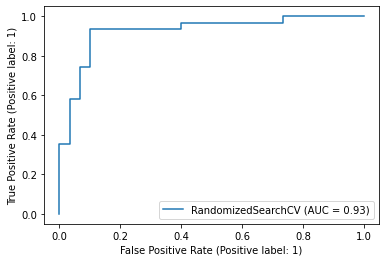

In [52]:
plot_roc_curve(rs_random_reg,X_test,Y_test);

In [56]:
print(confusion_matrix(Y_test,y_preds))

[[25  5]
 [ 2 29]]


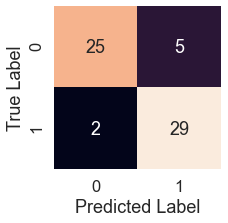

In [57]:
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    #Creating Heatmap of Confusion matrix"
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_confusion(Y_test,y_preds)

In [58]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.85      0.94      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## Calculate Evalution Metrics Using Cross_Validation

In [62]:
clf = RandomForestClassifier(n_estimators= 610,
     min_samples_split= 4,
     min_samples_leaf= 11,
     max_depth= None)

In [64]:
#Cross Validated Accuracy
cv_acc = cross_val_score(clf,X_train,Y_train,cv=5,scoring="accuracy")
accuracy = np.mean(cv_acc)
accuracy

0.8098639455782314

In [66]:
#Cross Validated Precision
cv_acc = cross_val_score(clf,X_train,Y_train,cv=5,scoring="precision")
precison = np.mean(cv_acc)
precison

0.8090795641140469

In [67]:
#Cross Validated Recall
cv_acc = cross_val_score(clf,X_train,Y_train,cv=5,scoring="recall")
recall = np.mean(cv_acc)
recall

0.8803418803418802

In [70]:
#Cross Validated f1_Score
cv_acc = cross_val_score(clf,X_train,Y_train,cv=5,scoring="f1")
f1_score = np.mean(cv_acc)
f1_score

0.8394499530143846

In [74]:
#Visualise our Cross Validated Metrics
cv_metrics = pd.DataFrame({"Accuracy":accuracy,
                          "Precision":precison,
                          "Recall":recall,
                          "f1_score":f1_score},
                         index=[0])

cv_metrics

,Accuracy,Precision,Recall,f1_score
0,0.809864,0.80908,0.880342,0.83945


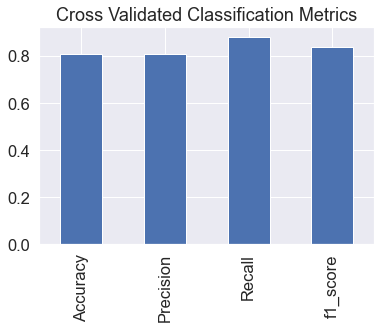

In [77]:
cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",legend=False);

## Feature Importance

In [80]:
clf.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=11, min_samples_split=4,
                       n_estimators=610)

In [81]:
clf.feature_importances_

array([0.03802172, 0.02461967, 0.17229744, 0.02168396, 0.02422114,
       0.00036236, 0.00945692, 0.11141034, 0.09962031, 0.12456695,
       0.06378213, 0.15929375, 0.15066331])

In [87]:
feature_dict = dict(zip(df.columns,list(clf.feature_importances_)))

In [88]:
feature_dict

{'age': 0.03802172341566648,
 'sex': 0.024619667479725993,
 'cp': 0.17229743832147346,
 'trestbps': 0.021683963661958742,
 'chol': 0.02422114255089643,
 'fbs': 0.0003623645174419721,
 'restecg': 0.00945691723016819,
 'thalach': 0.11141033900885586,
 'exang': 0.09962030549075229,
 'oldpeak': 0.12456694733354724,
 'slope': 0.0637821320573713,
 'ca': 0.15929375155970044,
 'thal': 0.1506633073724417}

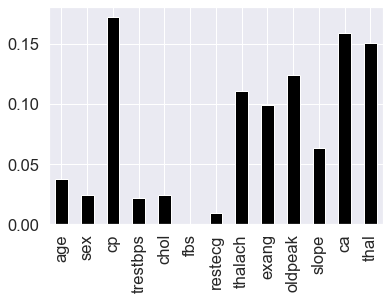

In [94]:
#Visualise Feature Importances
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',legend=False,color='black');


In [95]:
from joblib import dump

#Save Model to File
dump(clf, filename="Heart_Disease-Model.joblib")

['Heart_Disease-Model.joblib']